# **Mielage Prediction**

In [80]:
#import required libraries
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [82]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [83]:
df.shape

(398, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [85]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [86]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


# **Data Preprocessing**

In [87]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [88]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [89]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [90]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

From this we can say that the column horsepower has 6 null values.

In [91]:
df.corr()

<ipython-input-91-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [92]:
 df.dropna(inplace=True)

In [93]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [94]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# **Data Visualization**

In [95]:
import seaborn as sns

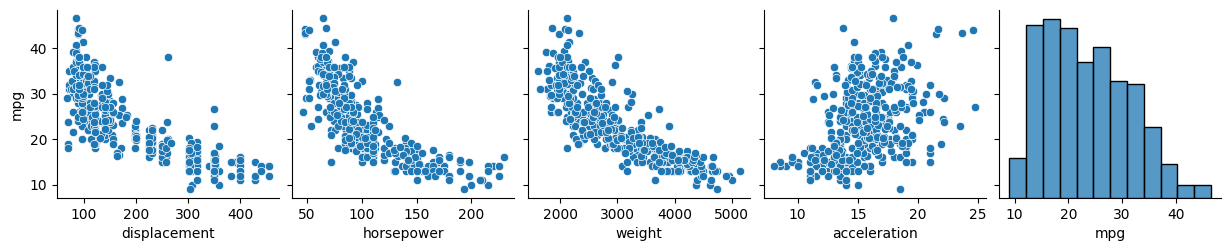

In [96]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

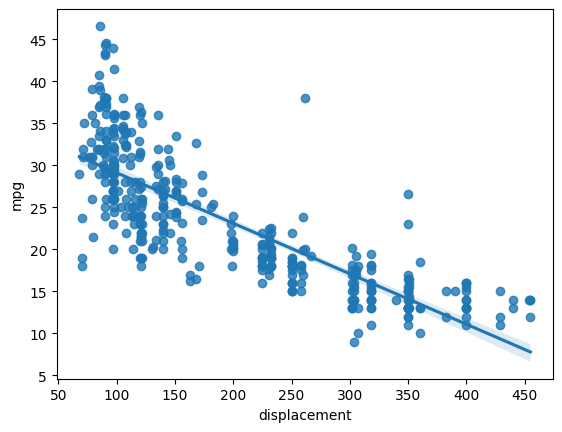

In [97]:
sns.regplot(df,x = 'displacement',y='mpg')

# **Define the target and predictable columns**

In [98]:
#let's split the data

Y = df['mpg']

X = df[['displacement','horsepower','weight','acceleration']]

In [99]:
Y.shape

(392,)

In [100]:
X.shape

(392, 4)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [103]:
X_train.shape

(294, 4)

In [104]:
X_test.shape

(98, 4)

In [105]:
Y_train.shape

(294,)

In [106]:
Y_test.shape

(98,)

# **Model Building**

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
LR = LinearRegression()

In [109]:
LR.fit(X_train,Y_train)

LinearRegression()

In [110]:
LR.intercept_

46.737752201852636

In [111]:
LR.coef_

array([-0.01177772, -0.05074179, -0.0047095 , -0.09326471])

In [112]:
y_pred = LR.predict(X_test)

In [113]:
y_pred

array([30.11805235, 24.85004034, 32.61483527, 30.9950599 , 26.1306495 ,
       30.11117039,  9.93010828, 29.42524913, 22.40325967, 32.8392254 ,
       13.57918642, 24.17588351, 12.82751942, 30.0731243 , 20.53635639,
       26.85714026, 23.43756431, 29.02595752, 27.2799754 , 27.65355159,
       24.79768399, 30.6311983 , 31.37494973, 18.9043038 , 31.71726541,
       28.90415934, 25.06163453, 21.11831201, 32.11911161, 27.9519586 ,
       13.04211568, 22.71691983, 18.87366792, 27.45326272, 12.27302244,
       31.35994359, 12.74214493, 29.93218921, 14.36221225,  8.54825135,
       15.92033256, 30.49889904, 30.99444378, 29.45327076, 11.90278389,
        7.32068847, 21.8636016 , 30.76257485, 28.30929687, 31.67917625,
       14.01795246, 28.4125612 , 28.41420478, 29.33429517, 23.59982407,
       19.33384358, 21.64202759, 23.71543103, 27.87520991, 28.78793316,
        5.61935331, 23.2683012 , 24.94614263, 25.34766348, 27.11436344,
       29.23019335, 26.37748373, 31.69782919, 20.80088589, 10.26

# **Evaluation Metrics**

In [114]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error

In [115]:
print(mean_absolute_error(Y_test,y_pred))

3.4034548179725146


In [116]:
print(mean_absolute_percentage_error(Y_test,y_pred))

0.1559062684154265


In [117]:
print(mean_squared_error(Y_test,y_pred))

17.284827408707173


In [118]:
print(r2_score(Y_test,y_pred))

0.6572722435852493


In [119]:
#as we can see that the accuracy is very low, so this indicates that the model needs to be processed well to get better accuracy.

# **Scaling**

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
SS = StandardScaler()

In [122]:
X = SS.fit_transform(X)

In [123]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [124]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [127]:
X_train.shape

(294, 4)

In [128]:
X_test.shape

(98, 4)

In [129]:
Y_train.shape

(294,)

In [130]:
Y_test.shape

(98,)

In [131]:
LR = LinearRegression()

In [132]:
LR.fit(X_train,Y_train)

LinearRegression()

In [133]:
LR.intercept_

23.67467566786387

In [134]:
LR.coef_

array([-1.23089428, -1.9506174 , -3.99515404, -0.25697626])

In [135]:
y_pred = LR.predict(X_test)

In [136]:
y_pred

array([30.11805235, 24.85004034, 32.61483527, 30.9950599 , 26.1306495 ,
       30.11117039,  9.93010828, 29.42524913, 22.40325967, 32.8392254 ,
       13.57918642, 24.17588351, 12.82751942, 30.0731243 , 20.53635639,
       26.85714026, 23.43756431, 29.02595752, 27.2799754 , 27.65355159,
       24.79768399, 30.6311983 , 31.37494973, 18.9043038 , 31.71726541,
       28.90415934, 25.06163453, 21.11831201, 32.11911161, 27.9519586 ,
       13.04211568, 22.71691983, 18.87366792, 27.45326272, 12.27302244,
       31.35994359, 12.74214493, 29.93218921, 14.36221225,  8.54825135,
       15.92033256, 30.49889904, 30.99444378, 29.45327076, 11.90278389,
        7.32068847, 21.8636016 , 30.76257485, 28.30929687, 31.67917625,
       14.01795246, 28.4125612 , 28.41420478, 29.33429517, 23.59982407,
       19.33384358, 21.64202759, 23.71543103, 27.87520991, 28.78793316,
        5.61935331, 23.2683012 , 24.94614263, 25.34766348, 27.11436344,
       29.23019335, 26.37748373, 31.69782919, 20.80088589, 10.26

In [137]:
print(mean_absolute_percentage_error(Y_test,y_pred))

0.15590626841542685


In [138]:
print(mean_absolute_error(Y_test,y_pred))

3.4034548179725195


In [139]:
print(mean_squared_error(Y_test,y_pred))

17.28482740870721


In [140]:
print(r2_score(Y_test,y_pred))

0.6572722435852485


As the accuracy is not altering we need to opt for different ways to get better accuracy.

In [141]:
from sklearn.preprocessing import PolynomialFeatures

In [142]:
PF = PolynomialFeatures()

In [143]:
X_train2 = PF.fit_transform(X_train)

In [144]:
X_train2

array([[ 1.00000000e+00, -5.78047393e-01, -2.46329007e-01, ...,
         2.42309399e-01,  2.39631546e-01,  2.36983286e-01],
       [ 1.00000000e+00,  4.39000163e-02, -1.94302622e-01, ...,
         5.75930725e-02,  3.59946882e-03,  2.24960663e-04],
       [ 1.00000000e+00,  2.24463700e+00,  2.69316175e+00, ...,
         3.80799508e+00, -3.21629046e+00,  2.71652776e+00],
       ...,
       [ 1.00000000e+00, -4.15384224e-01, -5.06460933e-01, ...,
         2.08809886e-02, -1.07966082e-01,  5.58243433e-01],
       [ 1.00000000e+00, -9.22510573e-01, -1.02672478e+00, ...,
         4.96226973e-01, -1.31887175e+00,  3.50529655e+00],
       [ 1.00000000e+00,  1.96715277e+00,  1.18439658e+00, ...,
         5.66674520e+00, -1.33163696e+00,  3.12923368e-01]])

In [145]:
X_test2 = PF.fit_transform(X_test)

In [146]:
X_test2

array([[ 1.00000000e+00, -9.41647417e-01, -9.22672014e-01, ...,
         8.64128449e-01, -8.29496104e-01,  7.96251746e-01],
       [ 1.00000000e+00, -7.02436875e-01,  2.73934844e-01, ...,
         4.63242596e-02, -1.23946111e-02,  3.31632682e-03],
       [ 1.00000000e+00, -9.89489525e-01, -1.15679075e+00, ...,
         1.92693075e+00, -4.32598931e-01,  9.71191286e-02],
       ...,
       [ 1.00000000e+00, -2.52721056e-01,  4.04000807e-01, ...,
         9.86132342e-01,  4.17592806e-01,  1.76836053e-01],
       [ 1.00000000e+00, -7.02436875e-01,  1.95895267e-01, ...,
         2.76212810e-03,  1.98624669e-02,  1.42831026e-01],
       [ 1.00000000e+00,  1.58441591e+00,  1.70466044e+00, ...,
         3.90522155e+00, -1.82266835e+00,  8.50686672e-01]])

In [147]:
LR.fit(X_train2,Y_train)

LinearRegression()

In [148]:
LR.intercept_

21.570126511014177

In [149]:
LR.coef_

array([ 0.        , -2.81441791, -5.17202495, -1.26400353, -0.96356248,
       -1.0939689 ,  3.56699989,  1.64652884,  0.75363966, -1.2041105 ,
        1.31724744, -0.86180998, -1.36141446,  0.85389527,  0.09255656])

In [150]:
y_pred2 = LR.predict(X_test2)

In [151]:
y_pred2

array([31.24793321, 21.08417722, 34.66409368, 29.81312833, 26.3564695 ,
       30.89944755, 13.41423263, 29.71141288, 21.02989954, 36.64984663,
       15.41772626, 21.96549629, 14.10581529, 31.13933749, 16.13767474,
       25.31721347, 22.19142982, 29.9193275 , 28.65906614, 27.54688434,
       22.87764149, 32.41598306, 33.12657858, 16.59201982, 34.38490296,
       28.07448338, 24.87063051, 19.78158481, 34.81055589, 28.38076478,
       13.7830654 , 21.24032533, 17.04805706, 28.48829534, 13.18549776,
       33.19414986, 13.22639127, 29.40274908, 14.43751959, 10.98726011,
       15.11163136, 31.89453844, 31.59667511, 31.29024229, 12.94621865,
       15.68036541, 19.79279326, 33.58169716, 27.84086667, 34.11468681,
       14.40911497, 26.45658645, 26.47838519, 28.48135369, 19.95486275,
       18.22993174, 19.05439251, 20.79977046, 25.21853746, 27.65777648,
       16.35637812, 21.39737531, 22.30453883, 25.59054948, 25.97200857,
       28.42500414, 26.28339254, 34.26624695, 18.6267011 , 15.41

In [152]:
#accuracy metrics

In [153]:
print(mean_absolute_percentage_error(Y_test,y_pred2))

0.12707533991990963


In [154]:
print(mean_absolute_error(Y_test,y_pred2))

2.9648526700933697


In [155]:
print(mean_squared_error(Y_test,y_pred2))

15.13187636381318


In [156]:
print(r2_score(Y_test,y_pred2))

0.6999614798639759


# **From this we can say that the accuracy of the model is nearly 70%.**